# Average Global Analysis 

---
### Import Dependencies and Setup

In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
from pathlib import Path
from pprint import pprint
from citipy import citipy

### Load the CSV file 

In [3]:
csv_file = Path("Resources/global_historical_temps.csv")
temp_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
temp_data.head()

Year   Jan   Feb   Mar   Apr   May   Jun   Jul    Aug    Sep    Oct    Nov  \
0  1880 -0.18 -0.25 -0.09 -0.16 -0.10 -0.21 -0.18   -0.1  -0.15  -0.24  -0.22   
1  1881 -0.20 -0.14  0.03  0.05  0.06 -0.19  0.00  -0.04  -0.15  -0.22  -0.19   
2  1882  0.16  0.14  0.04 -0.17 -0.15 -0.23 -0.17  -0.07  -0.15  -0.24  -0.17   
3  1883 -0.29 -0.37 -0.12 -0.18 -0.18 -0.08 -0.07  -0.14  -0.22  -0.11  -0.23   
4  1884 -0.13 -0.08 -0.36 -0.40 -0.34 -0.36 -0.30  -0.28  -0.27  -0.25  -0.34   

     Dec    J-D    D-N    DJF   MAM    JJA    SON  
0  -0.18  -0.17    ***    *** -0.12  -0.17   -0.2  
1  -0.07  -0.09   -0.1  -0.17  0.04  -0.08  -0.19  
2  -0.36  -0.11  -0.09   0.07 -0.09  -0.16  -0.18  
3  -0.11  -0.18   -0.2  -0.34 -0.16   -0.1  -0.19  
4  -0.31  -0.29  -0.27  -0.11 -0.37  -0.31  -0.29

----------------
## Clean dataset

<strong>The sections of code in this section are as follows:</strong>

1. Rename certain columnsfor readability
2. Delete rows of years we don't need
3. Print new DataFrame to reflect this code

In [4]:
# Rename columns containing USD to remove ' symbol as it interfers with the code
temp_data = temp_data.rename(columns={"J-D": "Year Average", "DJF": "Dec/Jan/Feb (Summer)", "MAM": "Mar/Apr/May (Autumn)",
                                             "JJA": "Jun/Jul/Aug (Winter)", "SON": "Sep/Oct/Nov (Spring)"})

# Delete unwanted columns but maintain original copy
temp_data = temp_data.drop(columns=['D-N'], inplace=False)

unwanted_temp_data = temp_data[(temp_data['Year'] < 1979) | (temp_data['Year'] > 2022)]
temp_data = temp_data.drop(unwanted_temp_data.index, axis=0)

temp_data = temp_data.astype({"Aug": "float", "Sep": "float", "Oct": "float", "Nov": "float", "Dec": "float",
                             "Year Average": "float", "Dec/Jan/Feb (Summer)": "float", "Jun/Jul/Aug (Winter)": "float", "Sep/Oct/Nov (Spring)": "float", })
#temp_data = temp_data.set_index('Year')
temp_data.head()

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
99   1979  0.09 -0.10  0.19  0.15  0.04  0.14  0.04  0.17  0.25  0.26  0.28   
100  1980  0.30  0.39  0.30  0.30  0.35  0.21  0.22  0.19  0.21  0.13  0.30   
101  1981  0.53  0.42  0.48  0.32  0.25  0.29  0.32  0.35  0.15  0.12  0.23   
102  1982  0.05  0.15  0.03  0.15  0.18  0.06  0.15  0.04  0.14  0.13  0.18   
103  1983  0.53  0.43  0.42  0.28  0.34  0.23  0.18  0.36  0.37  0.17  0.30   

      Dec  Year Average  Dec/Jan/Feb (Summer)  Mar/Apr/May (Autumn)  \
99   0.48          0.17                  0.02                  0.13   
100  0.22          0.26                  0.39                  0.32   
101  0.41          0.32                  0.39                  0.35   
102  0.43          0.14                  0.20                  0.12   
103  0.17          0.31                  0.46                  0.34   

     Jun/Jul/Aug (Winter)  Sep/Oct/Nov (Spring)  
99                   0.11                  0.27  
100                  0.20                  0.21  
101                  0.32                  0.17  
102                  0.08                  0.15  
103                  0.26                  0.28

In [37]:
csv_file = Path("Resources/disasterdata.csv")
disaster_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
unwanted_disaster_data = disaster_data[(disaster_data['Year'] > 2022)]
disaster_data = disaster_data.drop(unwanted_disaster_data.index, axis=0)

disaster_data = disaster_data.drop(columns=['Unnamed: 0', 'Disaster Subgroup', 'ISO', 'Continent', 'Latitude', 'Longitude', 'Start Day', 'Total Deaths'])
disaster_data = disaster_data[~disaster_data['Disaster Type'].isin(['Animal accident', 'Complex Disasters', 'Extreme temperature', 'Glacial lake outburst',
                                                                    'Impact', 'Industrial accident', 'Insect infestation', 'Mass movement (dry)',
                                                                    'Miscellaneous accident', 'Transport accident'])]
disaster_data.head()

Disaster Number  Year Disaster Group Disaster Type    Country  \
0   1979-0094-GTM  1979        Natural    Earthquake  Guatemala   
1   1979-0113-COL  1979        Natural    Earthquake   Colombia   
2   1979-9200-HKG  1979        Natural       Drought  Hong Kong   
3   1979-0185-AIA  1979        Natural         Storm   Anguilla   
4   1979-0039-ALB  1979        Natural    Earthquake    Albania   

            Region  Start Month  
0  Central America         10.0  
1    South America         12.0  
2     Eastern Asia         10.0  
3        Caribbean          9.0  
4  Southern Europe          4.0

In [38]:
merged_df = pd.merge(temp_data, disaster_data, how='inner', on=('Year'))
merged_df.head()

Year   Jan  Feb   Mar   Apr   May   Jun   Jul   Aug   Sep  ...  \
0  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
1  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
2  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
3  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
4  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   

   Dec/Jan/Feb (Summer)  Mar/Apr/May (Autumn)  Jun/Jul/Aug (Winter)  \
0                  0.02                  0.13                  0.11   
1                  0.02                  0.13                  0.11   
2                  0.02                  0.13                  0.11   
3                  0.02                  0.13                  0.11   
4                  0.02                  0.13                  0.11   

   Sep/Oct/Nov (Spring)  Disaster Number  Disaster Group  Disaster Type  \
0                  0.27    1979-0094-GTM         Natural     Earthquake   
1                  0.27    1979-0113-COL         Natural     Earthquake   
2                  0.27    1979-9200-HKG         Natural        Drought   
3                  0.27    1979-0185-AIA         Natural          Storm   
4                  0.27    1979-0039-ALB         Natural     Earthquake   

     Country           Region Start Month  
0  Guatemala  Central America        10.0  
1   Colombia    South America        12.0  
2  Hong Kong     Eastern Asia        10.0  
3   Anguilla        Caribbean         9.0  
4    Albania  Southern Europe         4.0  

[5 rows x 24 columns]

In [85]:
# disaster_types = merged_df.groupby(['Start Month'])['Disaster Type'].count()
# disaster_types
# # summer_disasters = disaster_types['Disaster Type']
# # summer_disasters

# plt.figure(figsize=(20,10))  # Adjust the figure size as needed
# plt.bar(merged_df['Disaster Type'], merged_df['Start Month'])
# plt.xticks(rotation=45)
# plt.xlabel('Type of Disaster')
# plt.ylabel('Number of Disasters')
# plt.title('Disasters During Summer Months (Dec, Jan, Feb)')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# # Show the plot
# plt.tight_layout()
# plt.show()

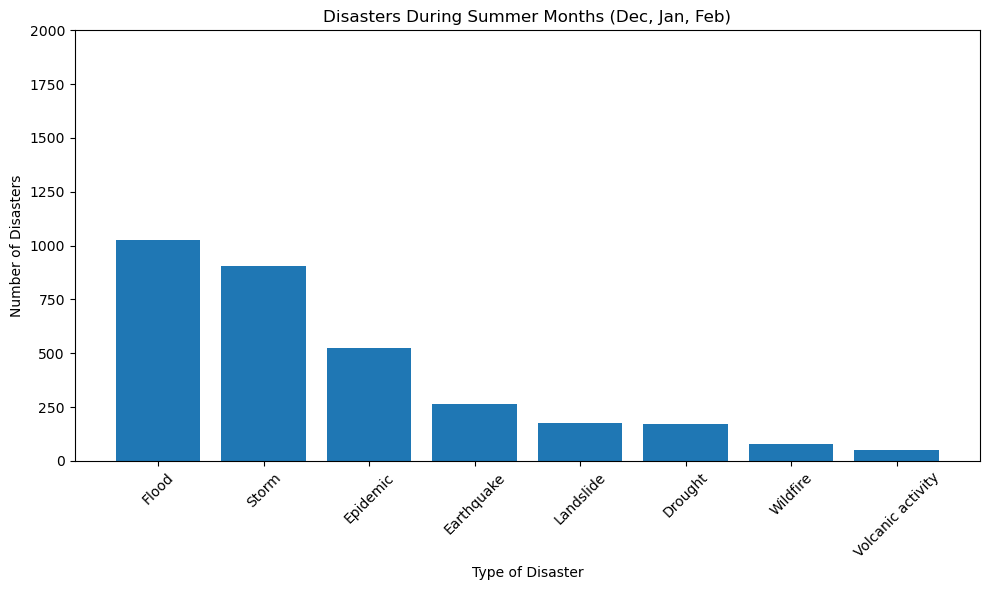

In [89]:
summer_df = merged_df[(merged_df['Start Month'] < 3.0) | (merged_df['Start Month'] > 11.0)]
summer_df.head()

disaster_types = summer_df.groupby(['Disaster Type']).count()
summer_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
summer_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax1 = plt.bar(summer_disasters.index, summer_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Summer Months (Dec, Jan, Feb)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

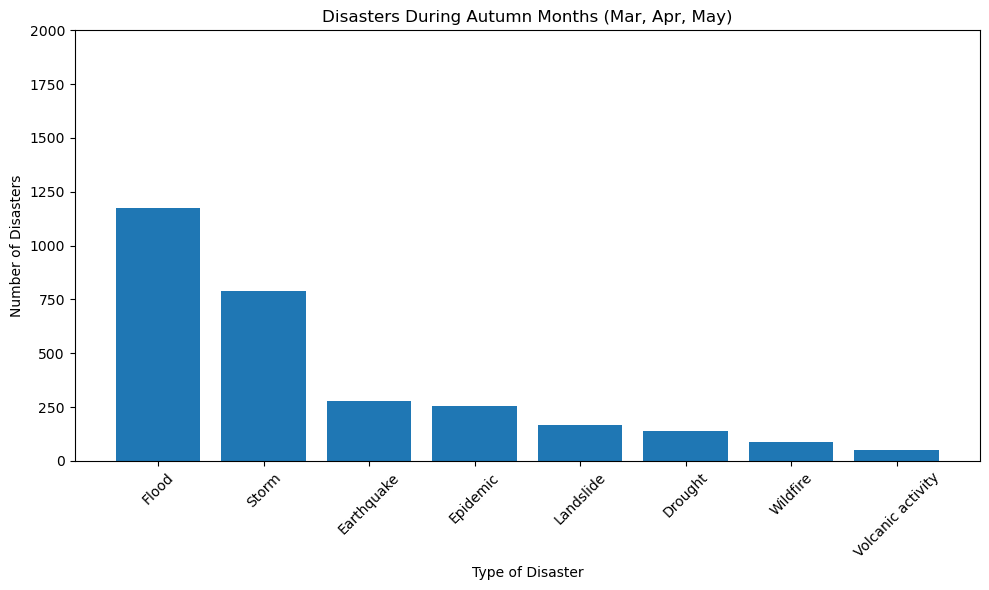

In [88]:
autumn_df = merged_df[(merged_df['Start Month'] < 6.0) & (merged_df['Start Month'] > 2.0)]
autumn_df

disaster_types = autumn_df.groupby(['Disaster Type']).count()
autumn_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
autumn_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax2 = plt.bar(autumn_disasters.index, autumn_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Autumn Months (Mar, Apr, May)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

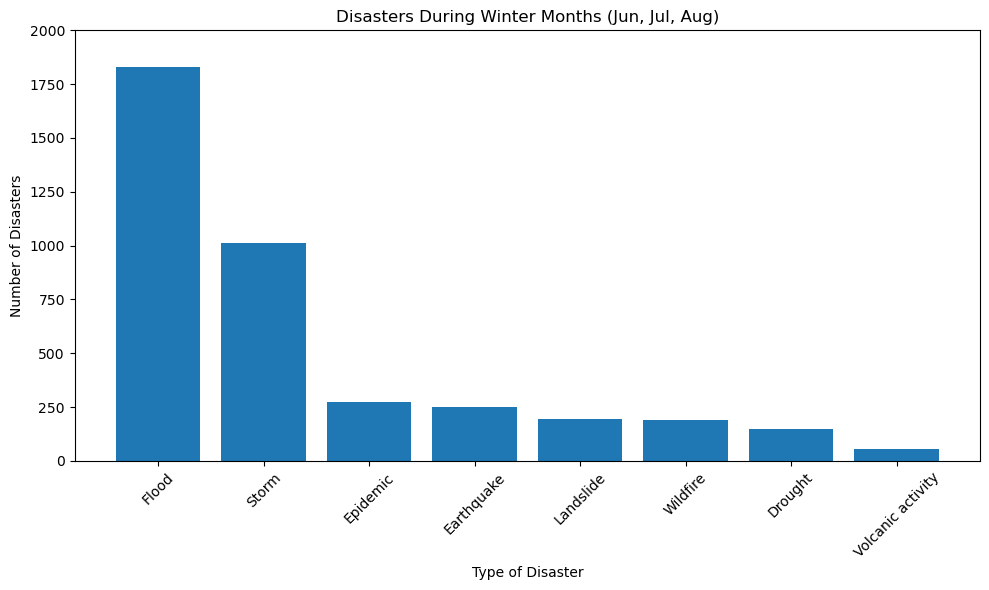

In [87]:
winter_df = merged_df[(merged_df['Start Month'] < 9) & (merged_df['Start Month'] > 5)]
winter_df

disaster_types = winter_df.groupby(['Disaster Type']).count()
winter_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
winter_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax3 = plt.bar(winter_disasters.index, winter_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Winter Months (Jun, Jul, Aug)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

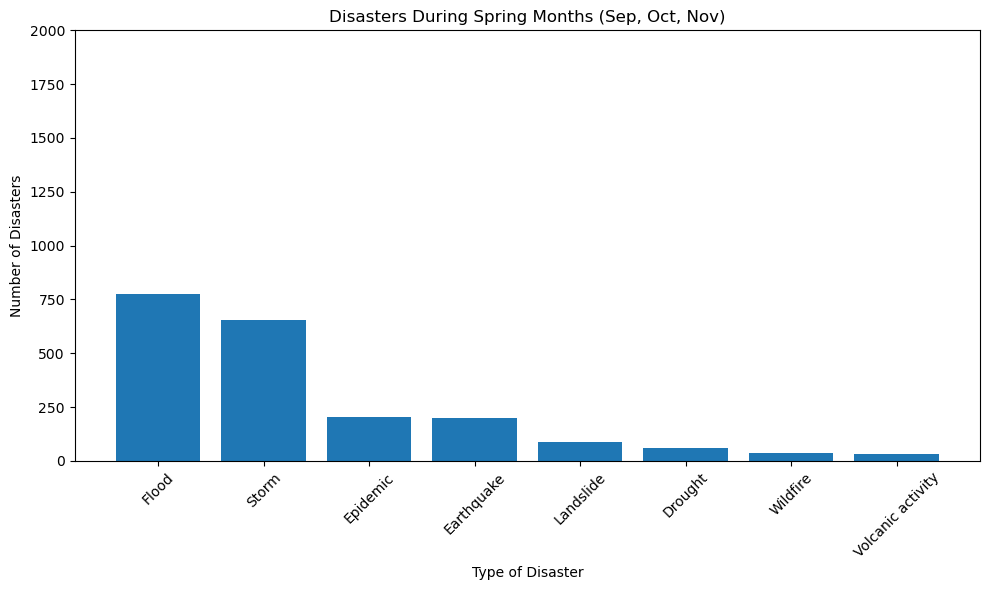

In [86]:
spring_df = merged_df[(merged_df['Start Month'] < 12) & (merged_df['Start Month'] > 9)]
spring_df

disaster_types = spring_df.groupby(['Disaster Type']).count()
spring_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
spring_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax4 = plt.bar(spring_disasters.index, spring_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Spring Months (Sep, Oct, Nov)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

In [91]:
ax1, ax2, ax3, ax4 = fig.subplots(2, 2)


plt.tight_layout()
plt.show()

NameError: name 'fig' is not defined

In [ ]:
disaster_types = merged_df.groupby(['Disaster Type']).count()
disaster_types.index

In [ ]:
# plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
# plt.plot(merged_df['Year'],merged_df['Year Average'], marker='o', linestyle='-')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Global Average Temperature')
# plt.title('Global Average Temperature vs. Time')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Show the plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# disaster_graph_data = merged_df.groupby(['Year']).count()['Disaster Number']

# plt.figure(figsize=(12, 6))
# plt.plot(disaster_graph_data, marker='o', linestyle='-')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Number of Disasters')
# plt.title('Number of Disasters vs. Time')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Show the plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [92]:
no_disasters = merged_df.groupby(['Year']).count()['Disaster Number']
#no_disasters
average_temp = merged_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6680\2021757786.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = merged_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

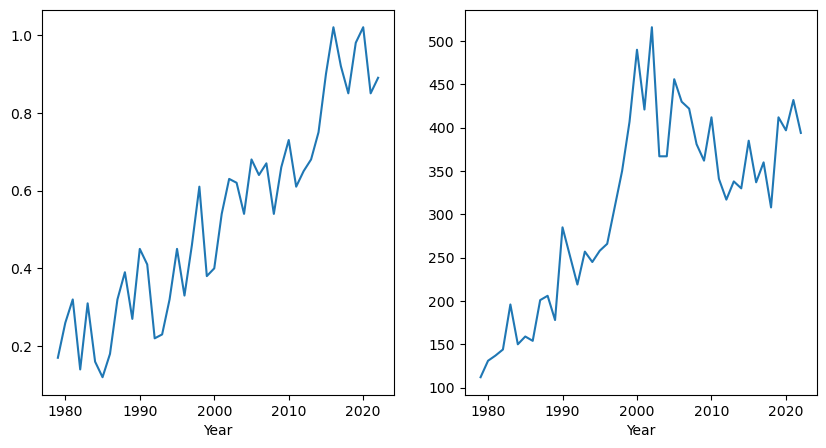

In [96]:
disaster_plot_data = no_disasters
# disaster_plot_data
temp_plot_data = average_temp
#temp_plot_data

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
disaster_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

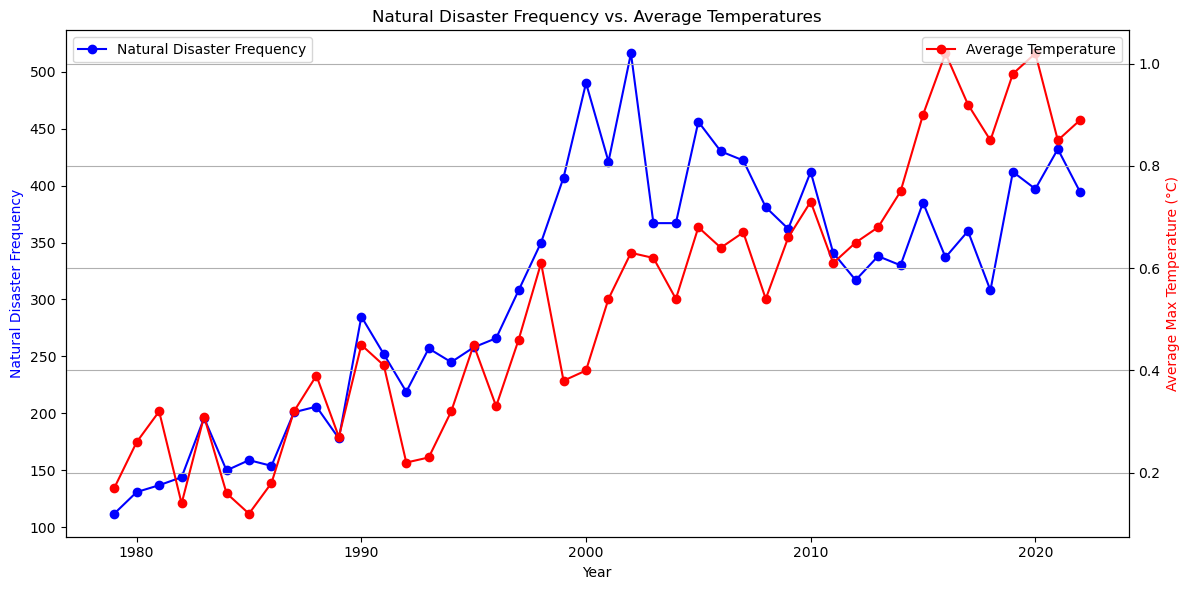

In [97]:
# Create a figure and the first subplot (Natural Disaster Frequency)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Natural Disaster Frequency data on the first subplot
ax1.plot(disaster_plot_data.index, disaster_plot_data.values, marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Natural Disaster Frequency', color='blue')
ax1.set_title('Natural Disaster Frequency vs. Average Temperatures')

# Create a second subplot that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Temperatures data on the second subplot
ax2.plot(temp_plot_data.index, temp_plot_data.values, marker='o', linestyle='-', color='red')
ax2.set_ylabel('Average Max Temperature (°C)', color='red')

# Add a legend for each subplot
ax1.legend(['Natural Disaster Frequency'], loc='upper left')
ax2.legend(['Average Temperature'], loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Save the plot
plt.savefig("Resources/combinedDisastervsTemp.png")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The r-value is 0.73


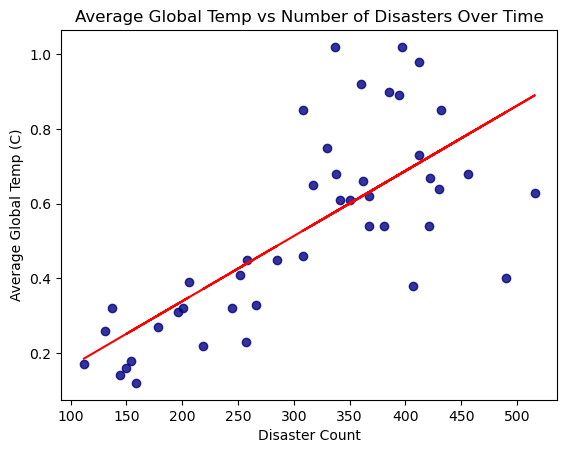

In [98]:
plt.scatter(no_disasters, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_disasters
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Disaster Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Disasters Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Floods

In [ ]:
flood_df = merged_df[merged_df['Disaster Type'] == 'Flood']
flood_df.head()

In [ ]:
no_floods = flood_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = flood_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
flood_plot_data = no_floods
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
flood_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_floods, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_floods
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Flood Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Floods Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Earthquakes

In [ ]:
earthquake_df = merged_df[merged_df['Disaster Type'] == 'Earthquake']
earthquake_df.head()

In [ ]:
no_earthquakes = earthquake_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = earthquake_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
earthquake_plot_data = no_earthquakes

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
earthquake_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_earthquakes, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_earthquakes
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Earthquake Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Earthquakes Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Storms

In [ ]:
storm_df = merged_df[merged_df['Disaster Type'] == 'Storm']
storm_df.head()

In [ ]:
no_storms = storm_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = storm_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
storm_plot_data = no_storms

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
storm_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_storms, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_storms
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Storm Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Storms Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Wildfires

In [ ]:
wildfire_df = merged_df[merged_df['Disaster Type'] == 'Wildfire']
wildfire_df.head()

In [ ]:
no_wildfires = wildfire_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = wildfire_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
wildfire_plot_data = no_wildfires

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
wildfire_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_wildfires, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_wildfires
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Wildfire Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Wildfires Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Volcanic Activity

In [ ]:
volcano_df = merged_df[merged_df['Disaster Type'] == 'Volcanic activity']
volcano_df.head()

In [ ]:
no_volcanos = volcano_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = volcano_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
wildfire_plot_data = no_volcanos

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
wildfire_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_volcanos, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_volcanos
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Volcanic Activity Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Volcanic Activity Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Landslides

In [ ]:
landslide_df = merged_df[merged_df['Disaster Type'] == 'Landslide']
landslide_df.head()

In [ ]:
no_landslides = landslide_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = landslide_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
landslide_plot_data = no_landslides

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
landslide_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_landslides, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_landslides
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Volcanic Activity Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Volcanic Activity Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Drought

In [ ]:
drought_df = merged_df[merged_df['Disaster Type'] == 'Drought']
drought_df.head()

In [ ]:
no_droughts = drought_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = drought_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
drought_plot_data = no_droughts

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
landslide_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_droughts, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_droughts
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Volcanic Activity Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Volcanic Activity Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Epidemic

In [ ]:
epidemic_df = merged_df[merged_df['Disaster Type'] == 'Epidemic']
epidemic_df.head()

In [ ]:
no_epidemics = epidemic_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = epidemic_df.groupby(['Year']).mean()['Year Average']
#average_temp

In [ ]:
epidemic_plot_data = no_epidemics

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
epidemic_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

In [ ]:
plt.scatter(no_epidemics, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_epidemics
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Epidemic Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Epidemic Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()